In [69]:
import tensorflow as tf
import numpy as np
import timeit
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

<h1>Extract MNIST data</h1>

In [70]:
from tensorflow.examples.tutorials.mnist import input_data
#get mnist data, with one_hot encoding, reshape = False (that means images are not flatten)
mnist = input_data.read_data_sets("MNIST_data/",reshape=False,one_hot=True)
#suppress warnings
tf.logging.set_verbosity(old_v)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h1>Prepare training, validation and testing data</h1>

In [71]:
x_train, y_train           = mnist.train.images, mnist.train.labels
x_validation, y_validation = mnist.validation.images, mnist.validation.labels
x_test, y_test             = mnist.test.images, mnist.test.labels

#pad images with 0s (28x28 to 32x32)
x_train      = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_validation = np.pad(x_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test       = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

x_train, y_train = shuffle(x_train, y_train)

<h1>Define hyperparameter</h1>

In [72]:
#learning rate
lr = 0.001
#number of traning steps
num_steps = 50
#number of batch_size
batch_size = 100
#num_input = 784
num_classes = 10

num_train_batches = int(55000 / batch_size)
num_valid_batches = int(5000 / batch_size)
num_test_batches = int(10000 / batch_size)

In [73]:
tf.reset_default_graph()

<h1>Placeholder</h1>

In [74]:
#tf graph input
X = tf.placeholder(tf.float32,[None,32,32,1],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

<h1>Define LeNet-5</h1>

In [78]:
def LeNet(x):    
    #first conv/pool pair
    conv1 = tf.layers.conv2d(x, 6, 5, activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(conv1, 2, 2)
    
    #second conv/pool pairr
    conv2 = tf.layers.conv2d(pool1, 16, 5, activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(conv2, 2, 2)
    
    #flatten to connect to fully connected
    full_in = flatten(pool2)
    
    #fully connected layer
    full1 = tf.contrib.layers.fully_connected(inputs=full_in, num_outputs=120, activation_fn=tf.nn.relu)
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=84, activation_fn=tf.nn.relu)
    logits = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=10, activation_fn=None)
    return logits

<h1>Cost and optimization</h1>

In [79]:
#predicted labels
logits = LeNet(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
#optimizer = tf.train.AdamOptimizer()
#train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h1>Training, validating, testing</h1>
<h2>1. Print out validation accuracy after each training epoch</h2>
<h2>2. Print out training time on each epoch</h2>
<h2>3. Print out testing accuracy</h2>

step 0, Accuracy= 0.974
step 1, Accuracy= 0.982
step 2, Accuracy= 0.987
step 3, Accuracy= 0.988
step 4, Accuracy= 0.988
step 5, Accuracy= 0.987
step 6, Accuracy= 0.987
step 7, Accuracy= 0.987
step 8, Accuracy= 0.986
step 9, Accuracy= 0.989
step 10, Accuracy= 0.990
step 11, Accuracy= 0.988
step 12, Accuracy= 0.990
step 13, Accuracy= 0.990
step 14, Accuracy= 0.988
step 15, Accuracy= 0.988
step 16, Accuracy= 0.990
step 17, Accuracy= 0.990
step 18, Accuracy= 0.991
step 19, Accuracy= 0.989
step 20, Accuracy= 0.989
step 21, Accuracy= 0.990
step 22, Accuracy= 0.990
step 23, Accuracy= 0.991
step 24, Accuracy= 0.988
step 25, Accuracy= 0.990
step 26, Accuracy= 0.989
step 27, Accuracy= 0.988
step 28, Accuracy= 0.990
step 29, Accuracy= 0.986
step 30, Accuracy= 0.990
step 31, Accuracy= 0.992
step 32, Accuracy= 0.991
step 33, Accuracy= 0.990
step 34, Accuracy= 0.991
step 35, Accuracy= 0.991
step 36, Accuracy= 0.990
step 37, Accuracy= 0.990
step 38, Accuracy= 0.989
step 39, Accuracy= 0.990
step 40, A

Text(0.5, 1.0, 'Epoch vs accuracy')

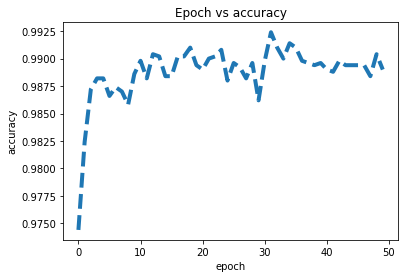

In [80]:
init = tf.global_variables_initializer()
acc_list = []
steps = []
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #epoch training
        #acc_t = 0
        for j in range(num_train_batches):
            #fetch batch
            batch_x = x_train[j*batch_size:j*batch_size + batch_size]
            batch_y = y_train[j*batch_size:j*batch_size + batch_size]
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            
            #acc_t += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        #acc_t = acc_t/len(train_set_data)
        #print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))
            
        #epoch validation
        acc = 0
        for j in range(num_valid_batches):
            #fetch batch
            batch_x = x_validation[j*batch_size:j*batch_size + batch_size]
            batch_y = y_validation[j*batch_size:j*batch_size + batch_size]
            #run optimization
            acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc = acc/num_valid_batches
        
        acc_list.append(acc)
        steps.append(i)
        print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    print("Training finished!")
    
    acc = 0
    for k in range(num_test_batches):
        #fetch batch
        batch_x = x_test[k*batch_size:k*batch_size + batch_size]
        batch_y = y_test[k*batch_size:k*batch_size + batch_size]
        #run optimization
        acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})

    acc = acc/num_test_batches
    print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    #print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy')